In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
def kd(perc):

      return (1 - perc)**2 / perc

In [4]:
sigma = 1.5 #nm
conc = 50 / (sigma)**3

In [5]:
DataCond, DataA10 = {}, {}
ePR = [14]
ePP = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2]

In [6]:
with open('ePP-Perc-kD.dat', 'r') as fi:
      for row in fi:
            if row[0] != '#':
                  cols = row.split()
                  p = float(cols[0])
                  DataCond[p] = {}
                  DataCond[p]['Occupancy'] = float(cols[1])
                  DataCond[p]['kD'] = float(cols[2])

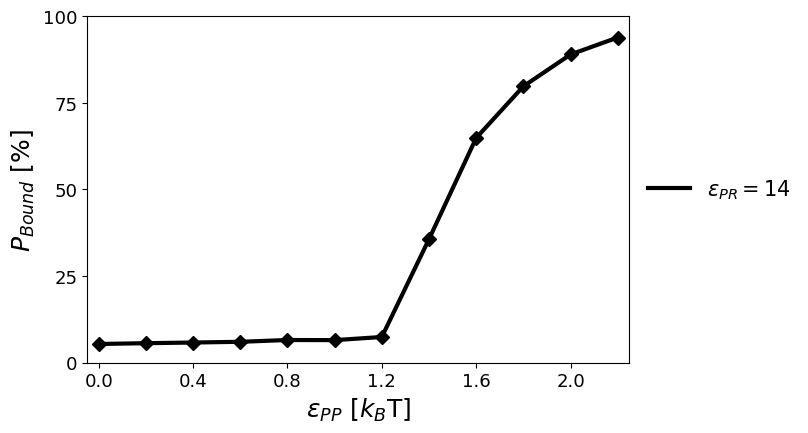

In [7]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.set_ylim([0,1])
ax.set_xlim([-.05,2.25])

ax.set_xlabel(r'$\varepsilon_{PP}$ [$k_B$T]', fontsize=18)
ax.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '2.0'], fontsize=13)

ax.set_ylabel(r'$P_{Bound}$ [%]', fontsize=18)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=13)

Occ_ePR14 = [DataCond[p]['Occupancy'] for p in DataCond.keys()]

ax.plot(DataCond.keys(), np.array(Occ_ePR14), marker='D', markersize=0, color='#000000', linewidth=3, label=r'$\varepsilon_{PR}=14$')
ax.plot(DataCond.keys(), np.array(Occ_ePR14), marker='D', markersize=7, color='#000000', linewidth=0)


line_legend = mlines.Line2D([], [], color='#000000', linestyle='-', linewidth=3, label=r'$\varepsilon_{PR}=14$')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Add the custom legend
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
fig.savefig('PercBound-Simple.png', dpi=300, bbox_inches='tight')

#fig.legend(loc="center right", bbox_to_anchor=(1.12, 0.5), ncol=1, fontsize=14)

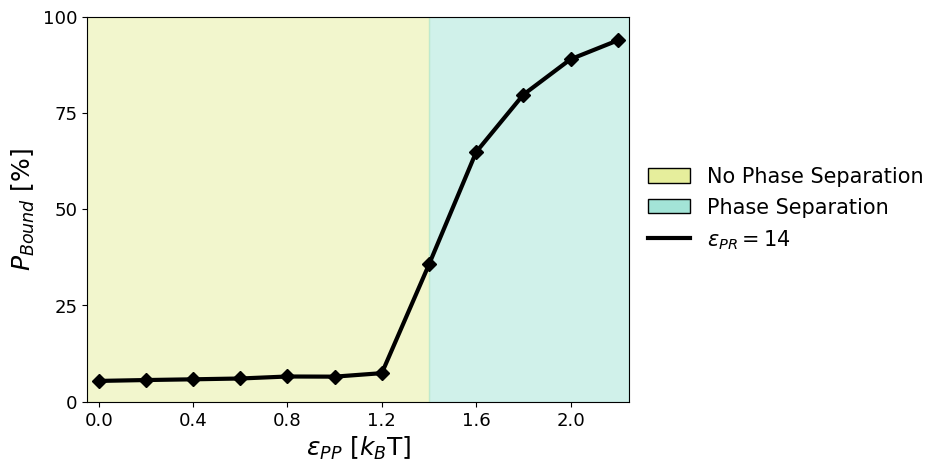

In [8]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.set_ylim([0,1])
ax.set_xlim([-.05,2.25])

ax.set_xlabel(r'$\varepsilon_{PP}$ [$k_B$T]', fontsize=18)
ax.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '2.0'], fontsize=13)

ax.set_ylabel(r'$P_{Bound}$ [%]', fontsize=18)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=13)

Occ_ePR14 = [DataCond[p]['Occupancy'] for p in DataCond.keys()]

ax.plot(DataCond.keys(), np.array(Occ_ePR14), marker='D', markersize=7, color='#000000', linewidth=3)#, label=r'$\varepsilon_{PR}=14$')

ax.fill_betweenx(y=[0,1], x1=-0.05, x2=1.4, color='#E6EE9C', alpha=0.5, )
ax.fill_betweenx(y=[0,1], x1=1.4, x2=2.25, color='#A3E4D7', alpha=0.5)

area1_patch = mpatches.Patch(facecolor='#E6EE9C', edgecolor='#000000', label='No Phase Separation')
area2_patch = mpatches.Patch(facecolor='#A3E4D7', edgecolor='#000000', label='Phase Separation')
line_legend = mlines.Line2D([], [], color='#000000', linestyle='-', linewidth=3, label=r'$\varepsilon_{PR}=14$')

# Add the custom legend
ax.legend(handles=[area1_patch, area2_patch, line_legend], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15, frameon=False)

fig.savefig('PercBound-Shadows.png', dpi=300, bbox_inches='tight')

#fig.legend(loc="center right", bbox_to_anchor=(1.12, 0.5), ncol=1, fontsize=14)

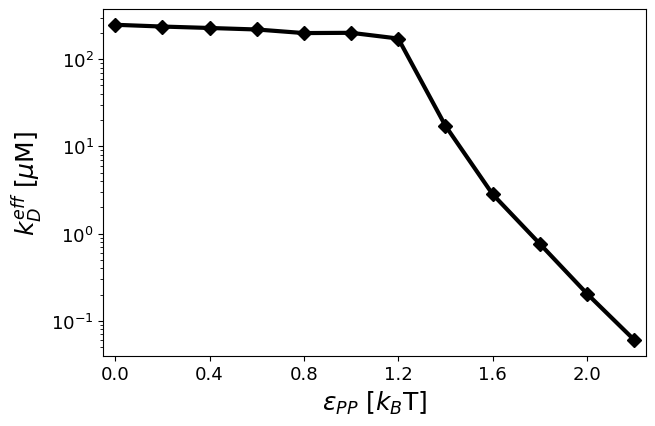

In [9]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

kD_ePR14 = [DataCond[p]['kD'] for p in DataCond.keys()]


#ax.set_ylim([0.1,1000])
ax.set_xlim([-.05,2.25])

ax.set_xlabel(r'$\varepsilon_{PP}$ [$k_B$T]', fontsize=18)
ax.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '2.0'], fontsize=13)

ax.set_ylabel(r'$k_D^{eff}$ [$\mu \text{M}$]', fontsize=18)
ax.set_yticks([1, 10, 100, 500, 1000])
ax.set_yticklabels([1, 10, 100, 500, 1000], fontsize=13)

Occ_ePR14 = [DataCond[p]['Occupancy'] for p in DataCond.keys()]

ax.semilogy(DataCond.keys(), kD_ePR14, marker='D', markersize=7, color='#000000', linewidth=3)#, label=r'$\varepsilon_{PR}=14$')

line_legend = mlines.Line2D([], [], color='#000000', linestyle='-', linewidth=3, label=r'$\varepsilon_{PR}=14$')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Add the custom legend

fig.savefig('kD_ePR14.png', dpi=300, bbox_inches='tight')

#fig.legend(loc="center right", bbox_to_anchor=(1.12, 0.5), ncol=1, fontsize=14)

In [10]:
for p in ePP:
      DataA10[p] = {'Occupation':[], 'kD':[]}
with open('ePR-ePP-rep-PercBound-A10.dat', 'r') as fi:
      for row in fi:
            if row[0] != '#':
                  cols = row.split()
                  p = float(cols[1])
                  DataA10[p]['Occupation'].append(float(cols[3]))
                  DataA10[p]['kD'].append(kd(float(cols[3])) * conc)

In [11]:
KdAverageSimple = {r:np.mean([DataA10[r]['kD'] for i in range(1,4)]) for r in DataA10.keys()}
KdErrorSimple = {r:np.std([DataA10[r]['kD'] for i in range(1,4)]) for r in DataA10.keys()}

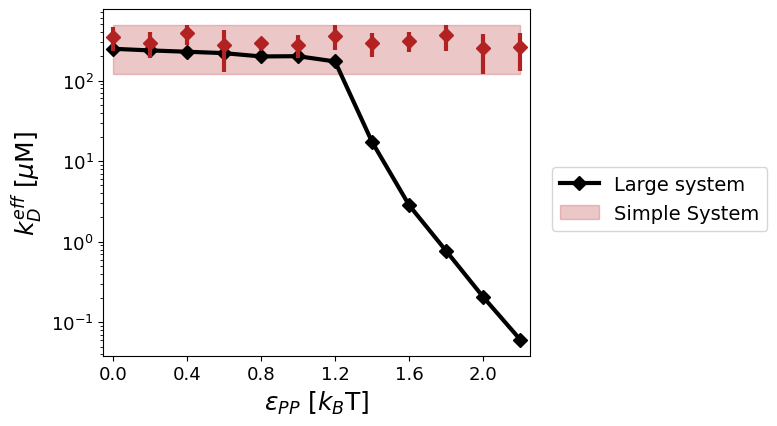

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5.5,5))

kD_ePR14 = [DataCond[p]['kD'] for p in DataCond.keys()]

kD_Simple = [KdAverageSimple[p] for p in KdAverageSimple.keys()]
kD_Error = [KdErrorSimple[p] for p in KdErrorSimple.keys()]

#ax.set_ylim([0.1,1000])
ax.set_xlim([-.05,2.25])

ax.set_xlabel(r'$\varepsilon_{PP}$ [$k_B$T]', fontsize=18)
ax.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '2.0'], fontsize=13)

ax.set_ylabel(r'$k_D^{eff}$ [$\mu \text{M}$]', fontsize=18)
ax.set_yticks([1, 10, 100, 500, 1000])
ax.set_yticklabels([1, 10, 100, 500, 1000], fontsize=13)

Occ_ePR14 = [DataCond[p]['Occupancy'] for p in DataCond.keys()]

ax.semilogy(DataCond.keys(), kD_ePR14, marker='D', markersize=7, color='#000000', linewidth=3, label=r'Large system')

ax.errorbar(DataCond.keys(), kD_Simple, yerr=kD_Error, marker='D', markersize=7, color='firebrick', linewidth=3, linestyle='')#, label=r'$\varepsilon_{PR}=14$')

MMAX = max(np.array(kD_Simple) + np.array(kD_Error))
MMIN = min(np.array(kD_Simple) - np.array(kD_Error))

ax.fill_between(DataCond.keys(), MMAX, MMIN, alpha=0.25, color='firebrick', label=r'Simple System')

line_legend = mlines.Line2D([], [], color='#000000', linestyle='-', linewidth=3, label=r'$\varepsilon_{PR}=14$')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Add the custom legend

fig.legend(loc="center right", bbox_to_anchor=(1.35, 0.5), ncol=1, fontsize=14)

fig.savefig('kD-Comparison-A10.png', dpi=300, bbox_inches='tight')

#fig.legend(loc="center right", bbox_to_anchor=(1.12, 0.5), ncol=1, fontsize=14)

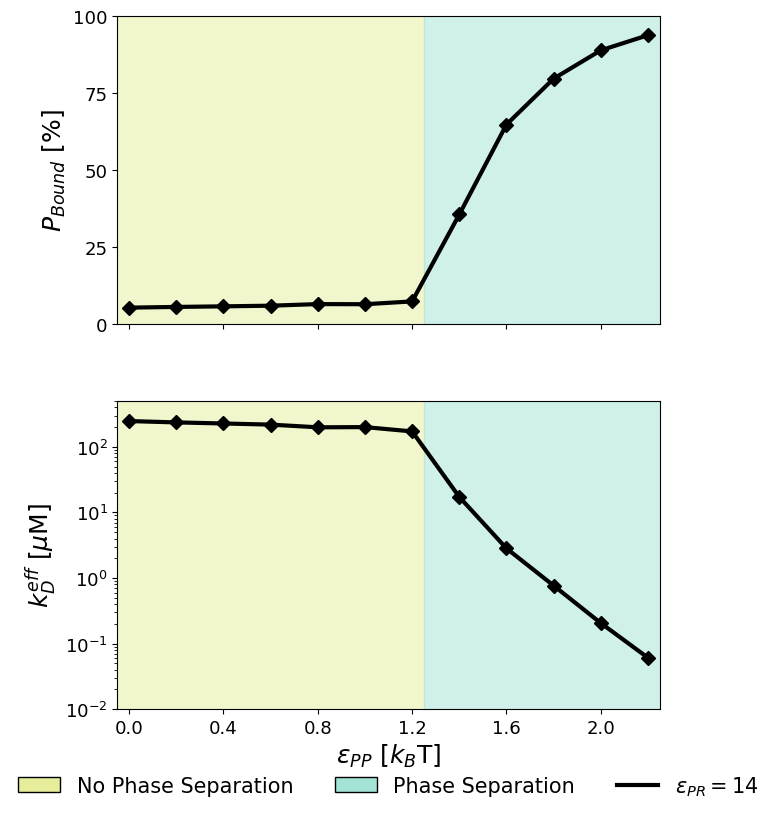

In [15]:
fig, (ax,bx) = plt.subplots(nrows=2,ncols=1,figsize=(7,9), sharex=True)

ax.set_ylim([0,1])
ax.set_xlim([-.05,2.25])

#ax.set_xlabel(r'$\varepsilon_{PP}$ [$k_B$T]', fontsize=18)
#ax.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
#ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '2.0'], fontsize=13)

ax.set_ylabel(r'$P_{Bound}$ [%]', fontsize=18)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=13)

Occ_ePR14 = [DataCond[p]['Occupancy'] for p in DataCond.keys()]

ax.plot(DataCond.keys(), np.array(Occ_ePR14), marker='D', markersize=7, color='#000000', linewidth=3)#, label=r'$\varepsilon_{PR}=14$')

ax.fill_betweenx(y=[0,1], x1=-0.05, x2=1.25, color='#E6EE9C', alpha=0.5, )
ax.fill_betweenx(y=[0,1], x1=1.25, x2=2.25, color='#A3E4D7', alpha=0.5)

area1_patch = mpatches.Patch(facecolor='#E6EE9C', edgecolor='#000000', label='No Phase Separation')
area2_patch = mpatches.Patch(facecolor='#A3E4D7', edgecolor='#000000', label='Phase Separation')
line_legend = mlines.Line2D([], [], color='#000000', linestyle='-', linewidth=3, label=r'$\varepsilon_{PR}=14$')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Add the custom legend
#ax.legend(handles=[area1_patch, area2_patch, line_legend], loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fontsize=15, frameon=False, ncols=3)

###################
# ######
# ######
#  KD

kD_ePR14 = [DataCond[p]['kD'] for p in DataCond.keys()]


bx.set_ylim([0.01,500])
bx.set_xlim([-.05,2.25])

bx.set_xlabel(r'$\varepsilon_{PP}$ [$k_B$T]', fontsize=18)
bx.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
bx.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '2.0'], fontsize=13)

bx.set_ylabel(r'$k_D^{eff}$ [$\mu \text{M}$]', fontsize=18)
bx.set_yticks([1, 10, 100, 500])
bx.set_yticklabels([1, 10, 100, 500], fontsize=13)

bx.semilogy(DataCond.keys(), kD_ePR14, marker='D', markersize=7, color='#000000', linewidth=3)#, label=r'$\varepsilon_{PR}=14$')

bx.fill_betweenx(y=[0,500], x1=-0.05, x2=1.25, color='#E6EE9C', alpha=0.5, )
bx.fill_betweenx(y=[0,500], x1=1.25, x2=2.25, color='#A3E4D7', alpha=0.5)

area1_patch = mpatches.Patch(facecolor='#E6EE9C', edgecolor='#000000', label='No Phase Separation')
area2_patch = mpatches.Patch(facecolor='#A3E4D7', edgecolor='#000000', label='Phase Separation')
line_legend = mlines.Line2D([], [], color='#000000', linestyle='-', linewidth=3, label=r'$\varepsilon_{PR}=14$')

box = bx.get_position()
bx.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Add the custom legend
bx.legend(handles=[area1_patch, area2_patch, line_legend], loc='upper center', bbox_to_anchor=(0.5, -0.15),
           fontsize=15, frameon=False, ncols=3)

plt.subplots_adjust(wspace=0, hspace=0.25)

fig.savefig('kD_ePR14.png', dpi=300, bbox_inches='tight')

fig.savefig('PercBound+kD_ePR14.png', dpi=300, bbox_inches='tight')

#fig.legend(loc="center right", bbox_to_anchor=(1.12, 0.5), ncol=1, fontsize=14)